# Data analysis of all Category Columns in relation to SteamSpyOwners from the steam game dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data Cleaning

### <b>Load in the csv file and leave relevant columns</b>

<b>CategorySinglePlayer</b> - (Boolean) True if for any i, categories[i].description is "single-player"

<b>CategoryMultiplayer</b> - (Boolean) True if for any i, categories[i].description is one of: "cross-platform multiplayer", "local multi-player", "multi-player", "online multi-player", "shared/split screen"

<b>CategoryCoop</b> - (Boolean) True if for any i, categories[i].description is one of: "co-op", "local co-op", "online co-op"

<b>CategoryMMO</b> - (Boolean) True if for any i, categories[i].description is "mmo"

<b>CategoryInAppPurchase</b> - (Boolean) True if for any i, categories[i].description is "in-app purchases"

<b>CategoryIncludeSrcSDK</b> - (Boolean) True if for any i, categories[i].description is "includes source sdk"

<b>CategoryIncludeLevelEditor</b> - (Boolean) True if for any i, categories[i].description is "includes level editor"

<b>CategoryVRSupport</b> - (Boolean) True if for any i, categories[i].description is "vr support"

<b>SteamSpyOwners</b>  - (Int) Number of people who own the game

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/COGS108/group036_fa20/master/Datasets/games-features.csv?token=AFASGDG236VMGHN44GU6Z4K72JSFU')


In [3]:
df_category = df[['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'SteamSpyOwners']]

df_category = df_category[df_category['SteamSpyOwners'] > 0]
df_category['SteamSpyOwnersLog'] = np.log(df_category['SteamSpyOwners'])


# Add Category_str Column

<b>createCate_str</b> - Function that aggregates all categories of each game into one string Category_str - Column of all categories of each game

In [4]:
def createCate_str(df):
    df['Category_str'] = ''
    
    if df['CategorySinglePlayer']:
        df['Category_str'] = df['Category_str'] + ' S'
    if df['CategoryMultiplayer']:
        df['Category_str'] = df['Category_str'] + ' M'
    if df['CategoryCoop']:
        df['Category_str'] = df['Category_str'] + ' C'
    if df['CategoryMMO']:
        df['Category_str'] = df['Category_str'] + ' O'
    if df['CategoryInAppPurchase']:
        df['Category_str'] = df['Category_str'] + ' P'
    if df['CategoryIncludeSrcSDK']:
        df['Category_str'] = df['Category_str'] + ' K'
    if df['CategoryIncludeLevelEditor']:
        df['Category_str'] = df['Category_str'] + ' E'
    if df['CategoryVRSupport']:
        df['Category_str'] = df['Category_str'] + ' V'
    return df



# Category_str Univariate Analysis¶

5 most common combinations of categories of games in the dataset are (SinglePlayer), (SinglePlayer, MultiPlayer), (SinglePlayer, MultiPlayer, Coop), (SinglePlayer, IncludeLevelEditor), (MultiPlayer).

In [5]:
df_category = df_category.apply(createCate_str, axis=1) 
df_category['Category_str'].value_counts(ascending = False).head()

 S        6869
 S M      1394
 S M C     680
 S E       218
 M         215
Name: Category_str, dtype: int64

In [6]:
category_cols=['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 
               'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 
               'CategoryIncludeLevelEditor', 'CategoryVRSupport']

In [7]:
lst = []
for col in category_cols:
    lst.append(pd.DataFrame(df_category[col].value_counts()))
category_game_counts = pd.concat(lst, axis = 1).T[True]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


Here, we plotted the number of games of each category. The plot obviously shows that most games in the dataset are of category SinglePlayer and MultiPlayer, while a few games are of category IncludeSrcSDK, InAppPurchase, and MMO.

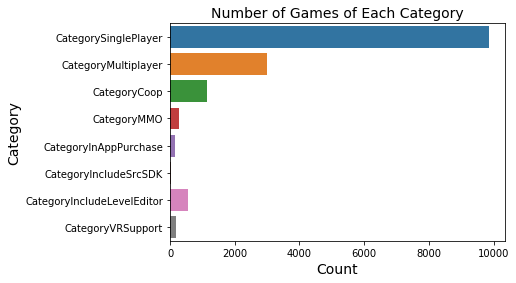

In [8]:
sns.barplot(category_game_counts.values, category_game_counts.index, orient = 'h')
plt.xlabel("Count", fontsize = 14) 
plt.ylabel("Category", fontsize = 14) 
plt.title("Number of Games of Each Category",fontsize = 14) 
plt.show()

# Category_Cols In Relation To Total SteamSpyOwners


Sum up the number of owners of games of each category



In [9]:
dic = {}
for col in category_cols:
    dic[col] = [df_category.loc[df_category[col]]['SteamSpyOwners'].sum()]
category_owners_sum = pd.DataFrame(dic, index = ['Sum']).T

The plot below shows that Singleplayer and Multiplayer games has largest total number of owners, which means that many people like to play Singleplayer and Multiplayer games.   MMO, IncludeSrcSDK, VRSupport have low popularity among players.

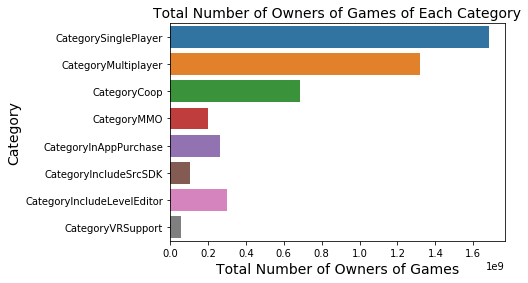

In [10]:
sns.barplot(category_owners_sum['Sum'], category_owners_sum.index.values, orient = 'h')
plt.xlabel("Total Number of Owners of Games", fontsize = 14) 
plt.ylabel("Category", fontsize = 14) 
plt.title("Total Number of Owners of Games of Each Category",fontsize = 14) 
plt.show()

# Categories Combinations In Relation To SteamSpyOwners

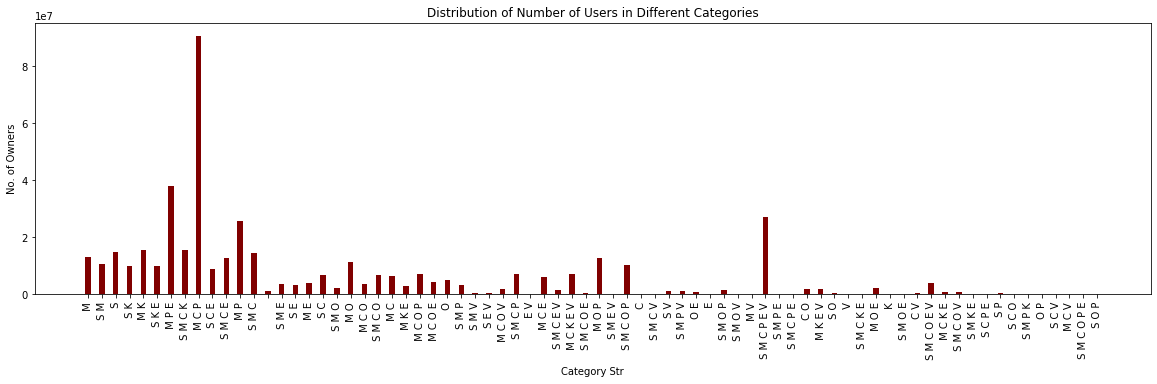

In [12]:
x = list(df_category['Category_str']) 
y = list(df_category['SteamSpyOwners']) 
   
fig = plt.figure(figsize = (20, 5)) 
  
# creating the bar plot 
plt.bar(x, y, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Category Str") 
plt.ylabel("No. of Owners") 
plt.title("Distribution of Number of Users in Different Categories",fontsize = 12) 
plt.xticks(rotation = 90)
plt.show() 

#### Comment:
According to the bar plot above, it is obvious that the games in categories (MultiPlayer, Coop and InAppPurchase) have the most users, far more than the the games has second most users, in categories (MultiPlayer, IncludeLevelEditor and InAppPurchase). Also games in categories (SinglePlayer, MultiPlayer, Coop, InAppPurchase, IncludeLevelEditor and VRSupport), and games in categories (MultiPlayer and InAppPurchase) have outstanding number of users. In contrast, there are some categories combination own very few users, such as (SinglePlayer, MMO and InAppPurchase), as well as combination of (MultiPlayer, Coop and VRSupport).